In [5]:
import pandas as pd

# Load the messy CSV file
file_path = "D:\Intership\Python\Messy data set.csv"
data = pd.read_csv(file_path)

# Display the first 5 rows in a clean table format
print(data.head())


  ID     Name         Age              Email    JoinDate Salary
0  1    Alice          25  alice@example.com  01-01-2020  50000
1  2      Bob          30    bob@example.com  not a date  60000
2  2      Bob          30    bob@example.com  01-02-2020  60000
3  4  Charlie         NaN           charlie@  01-03-2020  70000
4  5    David  Twenty-two                NaN  01-04-2020    NaN


In [6]:
data

,ID,Name,Age,Email,JoinDate,Salary
0,1,Alice,25,alice@example.com,01-01-2020,50000
1,2,Bob,30,bob@example.com,not a date,60000
2,2,Bob,30,bob@example.com,01-02-2020,60000
3,4,Charlie,NaN,charlie@,01-03-2020,70000
4,5,David,Twenty-two,NaN,01-04-2020,NaN
5,6,Eve,45,eve@example,01-05-2020,90000
6,7,Frank,50,frank@@example.com,01-06-2020,100000
7,8,Grace,55,grace@example.com,01-07-2020,one lakh
8,nine,Heidi,60,heidi@example.com,2020.08.01,120000
9,10,NaN,65,10@example.com,01-09-2020,130000


In [7]:
# Read the raw lines manually
with open(r"D:\Intership\Python\Messy data set.csv", 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Split each line by comma
data = [line.strip().split(',') for line in lines]

# Create DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

print(df.head())

  ID     Name         Age              Email    JoinDate Salary
0  1    Alice          25  alice@example.com  01-01-2020  50000
1  2      Bob          30    bob@example.com  not a date  60000
2  2      Bob          30    bob@example.com  01-02-2020  60000
3  4  Charlie                       charlie@  01-03-2020  70000
4  5    David  Twenty-two                     01-04-2020       


In [10]:
import pandas as pd
import numpy as np

# Convert empty strings to NaN
df.replace('', np.nan, inplace=True)

# Find missing values
missing_data = df.isnull().sum()
print("Missing Data:\n")
print(missing_data)

Missing Data:

ID          0
Name        1
Age         1
Email       1
JoinDate    0
Salary      1
dtype: int64


In [8]:
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')

# Convert Age → numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert Salary → numeric (handle 'one lakh' etc.)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Convert JoinDate → datetime
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')

# Name and Email stay as string (object)
df['Name'] = df['Name'].astype(str)
df['Email'] = df['Email'].astype(str)

# ✅ Check the updated types
print(df.dtypes)

# ✅ Optional: Check cleaned DataFrame
print(df)

ID                 float64
Name                object
Age                float64
Email               object
JoinDate    datetime64[ns]
Salary             float64
dtype: object
     ID     Name   Age               Email   JoinDate    Salary
0   1.0    Alice  25.0   alice@example.com 2020-01-01   50000.0
1   2.0      Bob  30.0     bob@example.com        NaT   60000.0
2   2.0      Bob  30.0     bob@example.com 2020-01-02   60000.0
3   4.0  Charlie   NaN            charlie@ 2020-01-03   70000.0
4   5.0    David   NaN                     2020-01-04       NaN
5   6.0      Eve  45.0         eve@example 2020-01-05   90000.0
6   7.0    Frank  50.0  frank@@example.com 2020-01-06  100000.0
7   8.0    Grace  55.0   grace@example.com 2020-01-07       NaN
8   NaN    Heidi  60.0   heidi@example.com 2020-08-01  120000.0
9  10.0           65.0      10@example.com 2020-01-09  130000.0


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(strategy = "mean")

In [11]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df[["Salary"]])
df[["Salary"]] = imputer.transform(df[["Salary"]])

In [12]:
df.dtypes

ID                 float64
Name                object
Age                float64
Email               object
JoinDate    datetime64[ns]
Salary             float64
dtype: object

In [13]:
unique_ages = df["Age"].unique()
print(unique_ages)

[25. 30. nan 45. 50. 55. 60. 65.]


In [14]:
df["Salary"] = df["Salary"].astype(int)

In [15]:
df.Salary

0     50000
1     60000
2     60000
3     70000
4     85000
5     90000
6    100000
7     85000
8    120000
9    130000
Name: Salary, dtype: int32

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df

,ID,Name,Age,Email,JoinDate,Salary
0,1.0,Alice,25.0,alice@example.com,2020-01-01,50000
1,2.0,Bob,30.0,bob@example.com,NaT,60000
2,2.0,Bob,30.0,bob@example.com,2020-01-02,60000
3,4.0,Charlie,NaN,charlie@,2020-01-03,70000
4,5.0,David,NaN,,2020-01-04,85000
5,6.0,Eve,45.0,eve@example,2020-01-05,90000
6,7.0,Frank,50.0,frank@@example.com,2020-01-06,100000
7,8.0,Grace,55.0,grace@example.com,2020-01-07,85000
8,NaN,Heidi,60.0,heidi@example.com,2020-08-01,120000
9,10.0,,65.0,10@example.com,2020-01-09,130000


In [18]:
from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+------+---------+-------+--------------------+---------------------+----------+
|    |   ID | Name    |   Age | Email              | JoinDate            |   Salary |
+====+======+=========+=======+====================+=====================+==========+
|  0 |    1 | Alice   |    25 | alice@example.com  | 2020-01-01 00:00:00 |    50000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  1 |    2 | Bob     |    30 | bob@example.com    | NaT                 |    60000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  2 |    2 | Bob     |    30 | bob@example.com    | 2020-01-02 00:00:00 |    60000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  3 |    4 | Charlie |   nan | charlie@           | 2020-01-03 00:00:00 |    70000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  4 |    5 | David   |   nan |                    | 2

In [19]:
df["ID"] = pd.to_numeric(df["ID"], errors='coerce')  
df["ID"] = df["ID"].fillna(df["ID"].mean())          
df["ID"] = df["ID"].astype(int)                      

In [20]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')  
df["Age"] = df["Age"].fillna(df["Age"].mean())          
df["Age"] = df["Age"].astype(int)                       

In [21]:
df

,ID,Name,Age,Email,JoinDate,Salary
0,1,Alice,25,alice@example.com,2020-01-01,50000
1,2,Bob,30,bob@example.com,NaT,60000
2,2,Bob,30,bob@example.com,2020-01-02,60000
3,4,Charlie,45,charlie@,2020-01-03,70000
4,5,David,45,,2020-01-04,85000
5,6,Eve,45,eve@example,2020-01-05,90000
6,7,Frank,50,frank@@example.com,2020-01-06,100000
7,8,Grace,55,grace@example.com,2020-01-07,85000
8,5,Heidi,60,heidi@example.com,2020-08-01,120000
9,10,,65,10@example.com,2020-01-09,130000


In [22]:
from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+------+---------+-------+--------------------+---------------------+----------+
|    |   ID | Name    |   Age | Email              | JoinDate            |   Salary |
+====+======+=========+=======+====================+=====================+==========+
|  0 |    1 | Alice   |    25 | alice@example.com  | 2020-01-01 00:00:00 |    50000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  1 |    2 | Bob     |    30 | bob@example.com    | NaT                 |    60000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  2 |    2 | Bob     |    30 | bob@example.com    | 2020-01-02 00:00:00 |    60000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  3 |    4 | Charlie |    45 | charlie@           | 2020-01-03 00:00:00 |    70000 |
+----+------+---------+-------+--------------------+---------------------+----------+
|  4 |    5 | David   |    45 |                    | 2

In [23]:
Tabel = {"ID" : [1,2,3,4,5,6,7,8,9,10],
        "Dpt":["DA","DS","ML","AI","BK","SF","CA","FI","HR","MR"],
        "City":["Mumbai","Delhi","Hy","Pune","Nasik","Panjab","Bang","USA","UK","Dubai"]}


In [24]:
DF= pd.DataFrame(Tabel)

In [25]:
DF

,ID,Dpt,City
0,1,DA,Mumbai
1,2,DS,Delhi
2,3,ML,Hy
3,4,AI,Pune
4,5,BK,Nasik
5,6,SF,Panjab
6,7,CA,Bang
7,8,FI,USA
8,9,HR,UK
9,10,MR,Dubai


In [26]:
joined_data = pd.merge(df, DF, on='ID', how='inner')
joined_data.head()

,ID,Name,Age,Email,JoinDate,Salary,Dpt,City
0,1,Alice,25,alice@example.com,2020-01-01,50000,DA,Mumbai
1,2,Bob,30,bob@example.com,NaT,60000,DS,Delhi
2,2,Bob,30,bob@example.com,2020-01-02,60000,DS,Delhi
3,4,Charlie,45,charlie@,2020-01-03,70000,AI,Pune
4,5,David,45,,2020-01-04,85000,BK,Nasik


In [27]:
concatenated_data = pd.concat([df, DF])
concatenated_data.head()

,ID,Name,Age,Email,JoinDate,Salary,Dpt,City
0,1,Alice,25.0,alice@example.com,2020-01-01,50000.0,NaN,NaN
1,2,Bob,30.0,bob@example.com,NaT,60000.0,NaN,NaN
2,2,Bob,30.0,bob@example.com,2020-01-02,60000.0,NaN,NaN
3,4,Charlie,45.0,charlie@,2020-01-03,70000.0,NaN,NaN
4,5,David,45.0,,2020-01-04,85000.0,NaN,NaN


In [28]:
df['Age'].value_counts()

45    3
30    2
25    1
50    1
55    1
60    1
65    1
Name: Age, dtype: int64

In [29]:
 DF.describe()

,ID
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [30]:
 grouped_var = df.groupby('Age')['Salary'].mean()


In [31]:
 grouped_var

Age
25     50000.000000
30     60000.000000
45     81666.666667
50    100000.000000
55     85000.000000
60    120000.000000
65    130000.000000
Name: Salary, dtype: float64

In [32]:
pivot_table = df.pivot_table(
    index='Age', 
    values=['Salary'], 
    aggfunc={'Age':'count','Salary': 'mean'}
)

In [33]:
pivot_table

,Age,Salary
Age,,
25,1,50000.000000
30,2,60000.000000
45,3,81666.666667
50,1,100000.000000
55,1,85000.000000
60,1,120000.000000
65,1,130000.000000


In [34]:
cross_tab = pd.crosstab(df['Age'], df['Name'])

In [35]:
 cross_tab

Name,,Alice,Bob,Charlie,David,Eve,Frank,Grace,Heidi
Age,,,,,,,,,
25,0,1,0,0,0,0,0,0,0
30,0,0,2,0,0,0,0,0,0
45,0,0,0,1,1,1,0,0,0
50,0,0,0,0,0,0,1,0,0
55,0,0,0,0,0,0,0,1,0
60,0,0,0,0,0,0,0,0,1
65,1,0,0,0,0,0,0,0,0


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

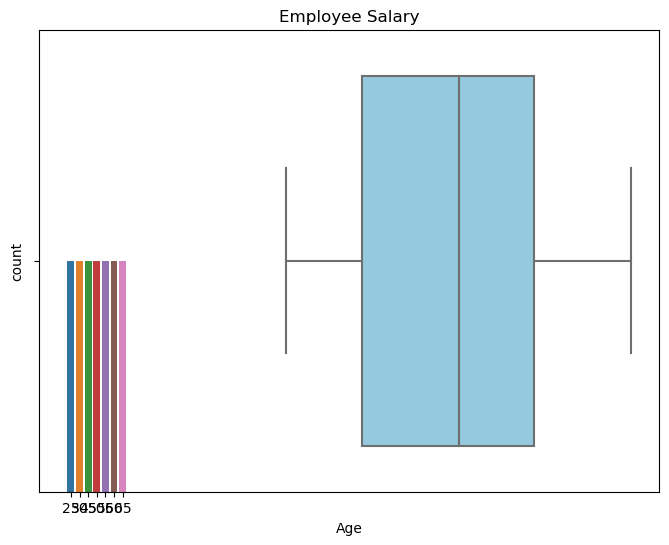

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Age', data = df)
sns.boxplot(x=df["Age"], color="skyblue")
plt.title("Employee Salary")
plt.xlabel("Age")
plt.show()

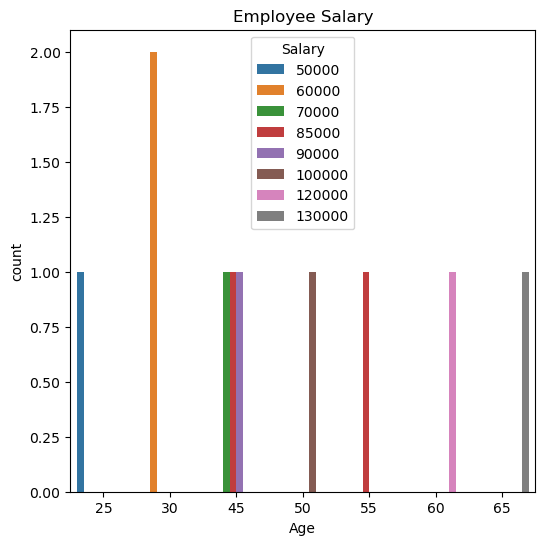

In [48]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Age', hue='Salary', data=df)
plt.title("Employee Salary")
plt.xlabel("Age")
plt.show()

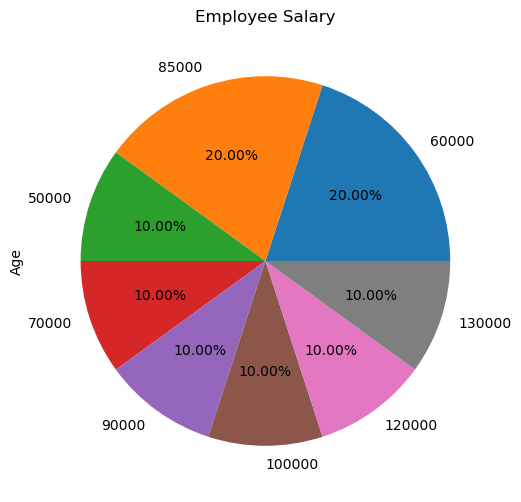

In [67]:
percentage = df['Salary'].value_counts()
plt.figure(figsize=(6, 6))
percentage.plot(kind='pie', autopct='%1.2f%%')  # Fixed quote and removed extra parenthesis
plt.title("Employee Salary")
plt.ylabel("Age")
plt.show()


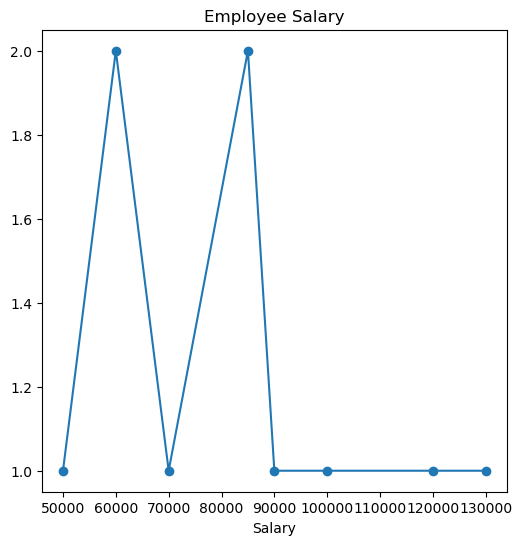

In [77]:
group_by = df.groupby('Salary').size()
plt.figure(figsize=(6, 6))
group_by.plot(kind='line', marker='o')  # Fixed quote and removed extra parenthesis
plt.title("Employee Salary")
#plt.ylabel("Salary")
plt.show()

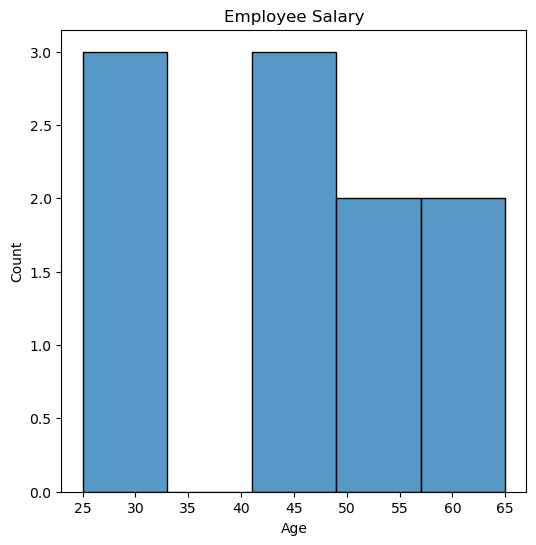

In [78]:
percentage = df['Salary'].value_counts()
plt.figure(figsize=(6, 6))
sns.histplot(df['Age'], bins=5)
plt.title("Employee Salary")
#plt.ylabel("Age")
plt.show()